In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [2]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
train_path= 'C:/Users/Mukhi2206/Desktop/CAPSTONE/BONE FRACTURE XRAY/train/'
test_path='C:/Users/Mukhi2206/Desktop/CAPSTONE/BONE FRACTURE XRAY/val/'

In [5]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
val_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 4,
    class_mode = 'binary')
validation_generator = val_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 4,
    shuffle=True,
    class_mode = 'binary')

Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [7]:
base_model = tf.keras.applications.EfficientNetB3(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 7, 7, 1536)        10783535  
 )                                                               
                                                                 
 gaussian_noise (GaussianNo  (None, 7, 7, 1536)        0         
 ise)                                                            
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                       

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','Precision','Recall','AUC'])

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
lrp=ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=2)
filepath='best_model.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
call=[checkpoint,lrp]
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch= 50,
    callbacks=call
    )

Epoch 1/10


50/50 [==============================] - ETA: 0s - loss: 0.9575 - accuracy: 0.6000 - precision: 0.5714 - recall: 0.5591 - auc: 0.6257
Epoch 1: val_accuracy improved from -inf to 0.59500, saving model to best_model.h5


c:\users\mukhi2206\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/50 [==============================] - 47s 685ms/step - loss: 0.9575 - accuracy: 0.6000 - precision: 0.5714 - recall: 0.5591 - auc: 0.6257 - val_loss: 0.9367 - val_accuracy: 0.5950 - val_precision: 0.4969 - val_recall: 0.9958 - val_auc: 0.7984 - lr: 0.0010
Epoch 2/10
50/50 [==============================] - ETA: 0s - loss: 0.7681 - accuracy: 0.6450 - precision: 0.6961 - recall: 0.6396 - auc: 0.7053
Epoch 2: val_accuracy improved from 0.59500 to 0.69500, saving model to best_model.h5
50/50 [==============================] - 29s 583ms/step - loss: 0.7681 - accuracy: 0.6450 - precision: 0.6961 - recall: 0.6396 - auc: 0.7053 - val_loss: 0.6552 - val_accuracy: 0.6950 - val_precision: 0.5888 - val_recall: 0.7875 - val_auc: 0.7455 - lr: 0.0010
Epoch 3/10
50/50 [==============================] - ETA: 0s - loss: 0.6725 - accuracy: 0.7200 - precision: 0.7207 - recall: 0.7619 - auc: 0.7500
Epoch 3: val_accuracy did not improve from 0.69500
50/50 [==============================] - 29s 584ms/step

In [10]:
model.evaluate(train_generator)

2216/2216 [==============================] - 334s 151ms/step - loss: 0.4030 - accuracy: 0.8164 - precision: 0.7926 - recall: 0.8517 - auc: 0.8999


[0.4030134379863739,
 0.8164278268814087,
 0.7925689816474915,
 0.8516997694969177,
 0.8999353051185608]

In [11]:
model.evaluate(validation_generator)

150/150 [==============================] - 27s 177ms/step - loss: 0.6672 - accuracy: 0.6767 - precision: 0.5871 - recall: 0.6458 - auc: 0.7512


[0.6671791672706604,
 0.6766666769981384,
 0.5871211886405945,
 0.6458333134651184,
 0.751197874546051]

1/1 [==============================] - 0s 83ms/step
[[0.91113824]]
THE UPLOADED X-RAY IMAGE IS: Fracture


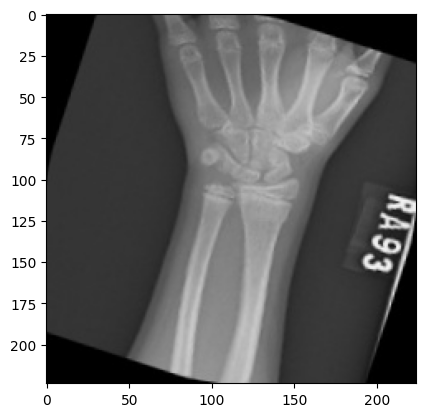

In [29]:
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('C:/Users/Mukhi2206/Desktop/CAPSTONE/BONE FRACTURE XRAY/val/1-rotated2-rotated1-rotated2.jpg',target_size=(224,224))
imag = img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a>0.5:
      op="Fracture"   
else:
      op="Normal"
plt.imshow(img)
print("THE UPLOADED X-RAY IMAGE IS: "+str(op))